<a href="https://colab.research.google.com/github/cong-1/LibreTranslate-py/blob/main/230112_Plot_SPY_mplfinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance --quiet
import mplfinance as mpf
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
folder_name = '/content/drive/MyDrive/alpha_vantage/final/'
file_name = 'full_data_SPY_M1_update01.feather'

In [2]:
spy = pd.read_feather(f'{folder_name}{file_name}')
spy['time'] = pd.to_datetime(spy['time'])
spy.set_index('time', inplace=True)
spy.head()

,open,high,low,close,volume
time,,,,,
2022-01-14 20:00:00,457.929922,457.969282,457.861043,457.861043,7325
2022-01-14 19:59:00,457.929922,457.929922,457.910243,457.910243,573
2022-01-14 19:57:00,457.920083,457.929922,457.851203,457.851203,1564
2022-01-14 19:55:00,457.959442,457.969282,457.959442,457.969282,875
2022-01-14 19:54:00,457.949602,457.969282,457.949602,457.949602,2519


/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




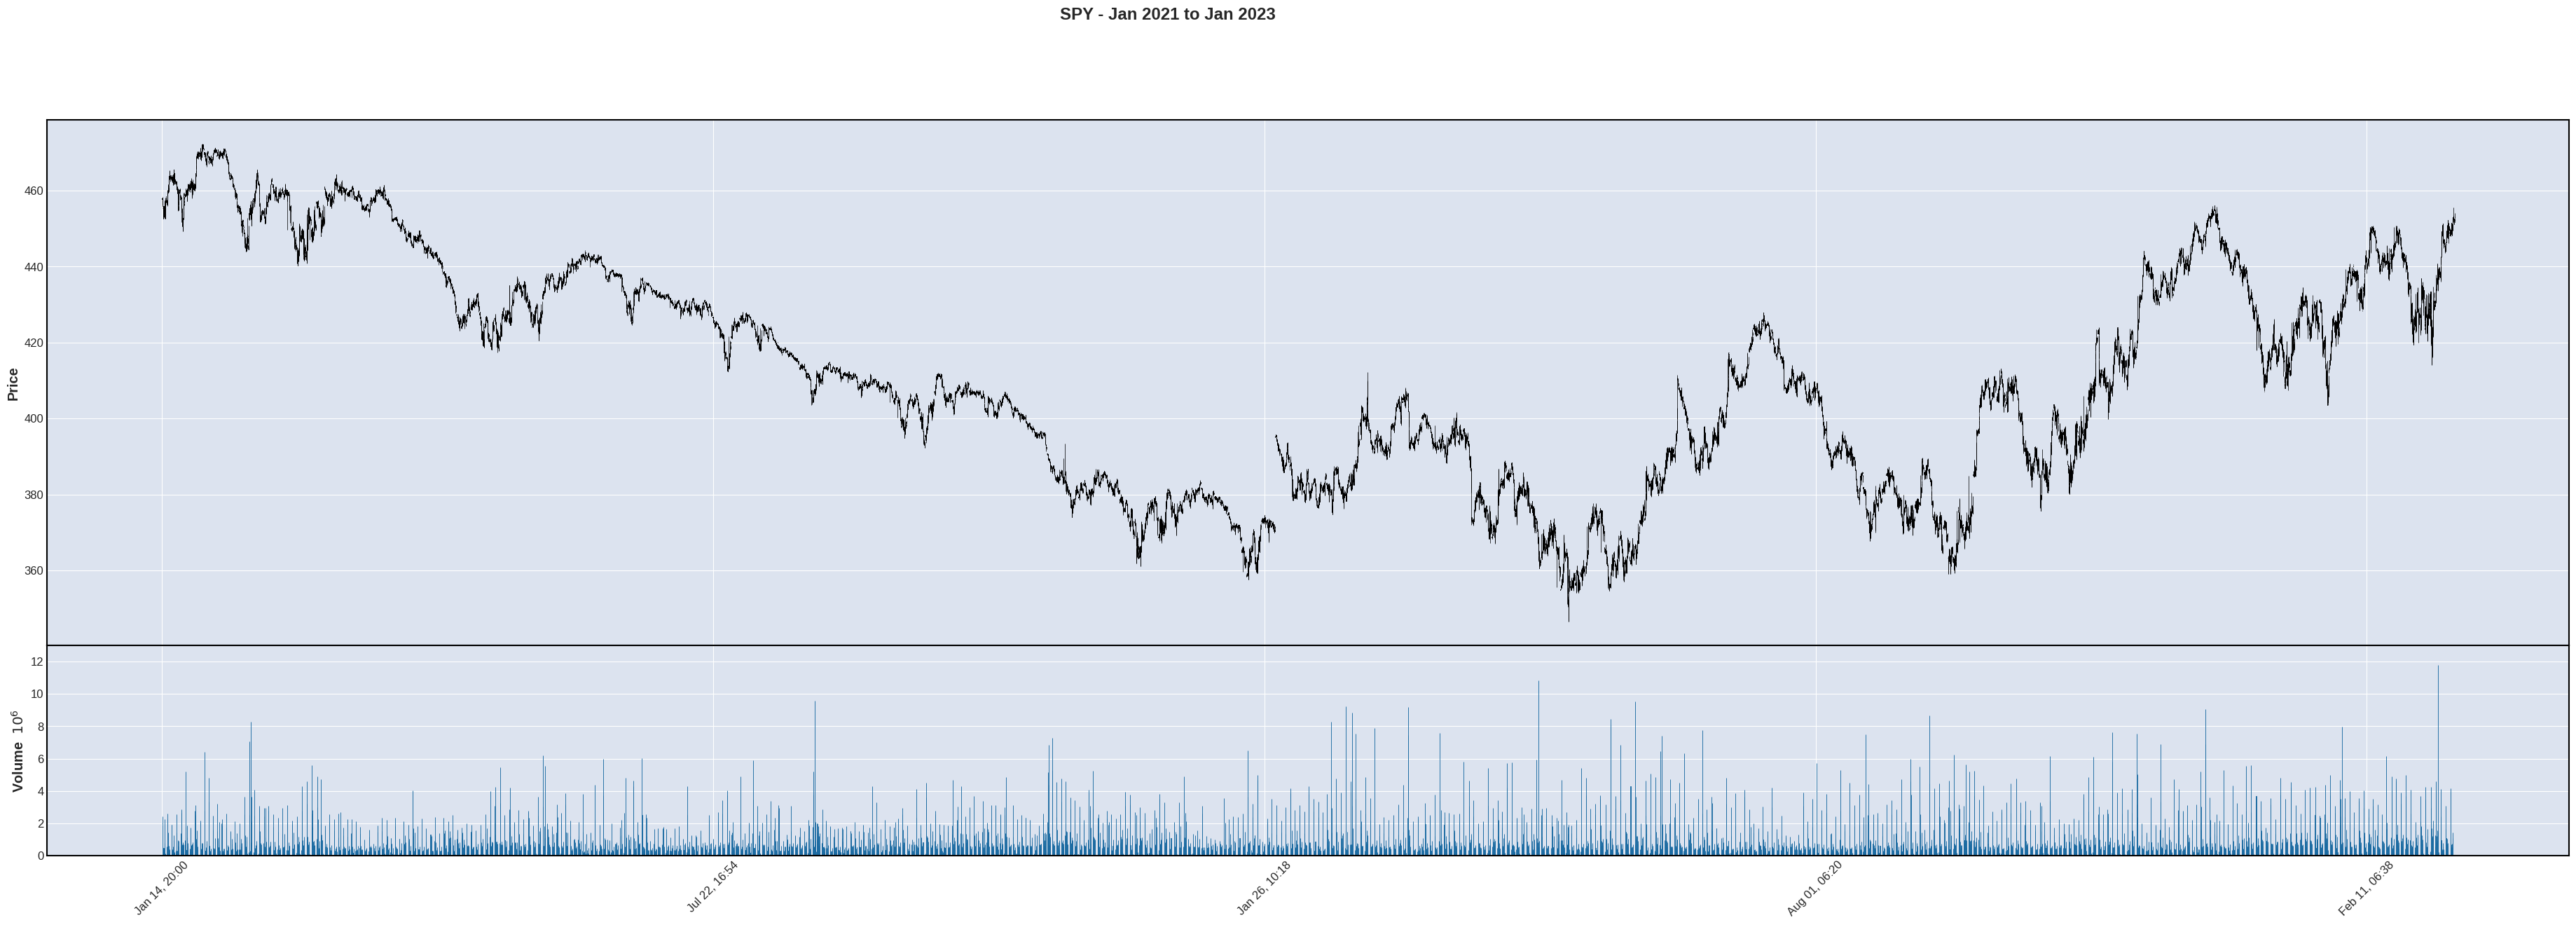

In [11]:
mpf.plot(spy,volume=True,figsize=(50,15), title='SPY - Jan 2021 to Jan 2023')

In [6]:
# will crash on too much data, don't try this at home
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Candlestick(
        x=spy.index,
        open=spy['open'],
        high=spy['high'],
        low=spy['low'],
        close=spy['close']
    )
)
fig.update_layout(
    title='SPY - Jan 2021 to Jan 2023',
    title_x=0.5,
    yaxis_title ='Price'
)
fig.show()